## csvファイルをDataFrame型の変数として読み込み

In [19]:
import pandas as pd
# csvの読み取り
df = pd.read_csv('stock_data/1805.csv', index_col='Date', parse_dates=True, dtype=float)
df = df.dropna() # 無効なデータ行を削除
df.info()
df.head()

FileNotFoundError: File b'stock_data/1805.csv' does not exist

In [14]:
from azureml import Workspace
ws = Workspace()
ds = ws.datasets ["stock_data/1805.cs"]
frame = ds.to_dataframe()

ImportError: cannot import name 'Workspace'

## matplotlib データを可視化し、定常性があるか確認せよ

In [6]:
!pip install mpl_finance

  Created wheel for mpl-finance: filename=mpl_finance-0.10.0-cp36-none-any.whl size=6364 sha256=75599d8c71bceb0aac558b70ee70da1a948f2ed3343ee9d2199a39142becf619
  Stored in directory: /home/nbuser/.cache/pip/wheels/67/db/24/04ddd06ec9a5e4500b44c13d8e95898f5b90b512303e385de8
Successfully built mpl-finance


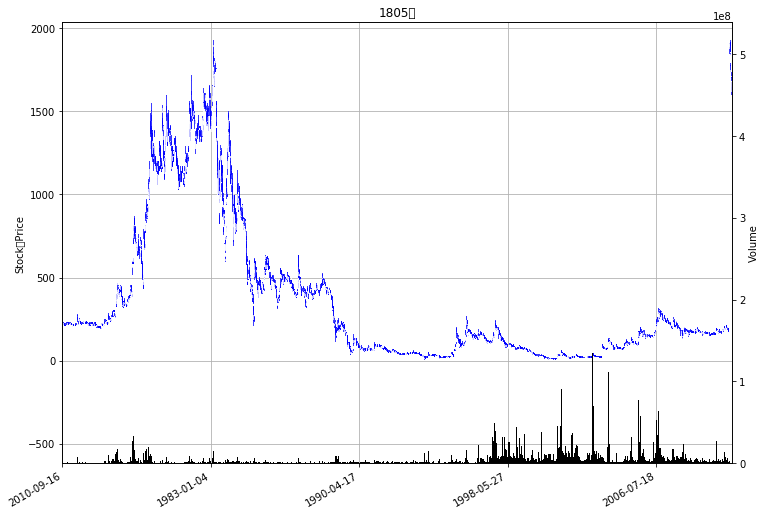

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
#import matplotlib.finance as mpf
import mpl_finance as mpf
from matplotlib.dates import date2num


#画像作成
fig = plt.figure(figsize=(12, 9))
ax = plt.subplot()

# ローソク足をプロット
mpf.candlestick2_ohlc(ax, df["Open"], df["Hight"], df["Low"], df["Close"], width=0.9, colorup="w", colordown="b")

ax.grid()  # グリッド表示
#ax.set_xlim(df.index[0].date(), df.index[-1].date())  # x軸の範囲
ax.set_xticklabels([(df.index[int(x)].date() if x < df.shape[0] else x) for x in ax.get_xticks()])
ax.set_xlim([0, df.shape[0]]) # 横軸の範囲はデータの個数(df.shape[0]個)までに変更しておく

fig.autofmt_xdate()  # x軸のオートフォーマット

ax.set_title("1805株")
ax.set_ylabel("Stock　Price")

# ローソク足を上側75%に収める
bottom, top = ax.get_ylim()
ax.set_ylim(bottom - (top - bottom) / 4, top)

# 出来高のチャートをプロット
ax2 = ax.twinx()
mpf.volume_overlay(ax2, df["Open"], df["Adj Close"], df["Volume"], width=1, colorup="g", colordown="g")
ax2.set_xlim([0, df.shape[0]])

# 出来高チャートは下側25%に収める
ax2.set_ylim([0, df.Volume.max() * 4])
ax2.set_ylabel("Volume")

plt.show()